# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02d_mass_analysis'

# Loading data

In [4]:
path_to_data= './../data/mass_ratios/fractions_mass_ratios.xlsx'

In [5]:
data = pd.read_excel(path_to_data)

print(data.shape)
data.head(3)

(8, 3)


,Membrane_Type,"Mass, mg","Ratio, %"
0,<70,13.0,1.868353
1,<25,26.7,3.837310
2,<5,623.5,89.609083


In [6]:
data

,Membrane_Type,"Mass, mg","Ratio, %"
0,<70,13.0,1.868353
1,<25,26.7,3.837310
2,<5,623.5,89.609083
3,<3,4.0,0.574878
4,<2.5,5.7,0.819201
5,<2,5.3,0.761713
6,<0.4,6.7,0.962920
7,<0.2,10.9,1.566542


# Data wrangling

## Column names correction

In [7]:
columns_dict = {
    'Membrane_Type': 'membrane',
    'Mass, mg': 'mass',
    'Ratio, %': 'ratio'
}

In [8]:
data = data.rename(columns=columns_dict)

print(data.shape)
data.head(3)

(8, 3)


,membrane,mass,ratio
0,<70,13.0,1.868353
1,<25,26.7,3.837310
2,<5,623.5,89.609083


## Column values correction

In [9]:
data['membrane'] = data['membrane'].apply(lambda x: f'${x}$')
data['mass'] = data['mass'].apply(lambda x: round(x, 2))
data['ratio'] = data['ratio'].apply(lambda x: round(x, 2))

print(data.shape)
data.head(3)

(8, 3)


,membrane,mass,ratio
0,$<70$,13.0,1.87
1,$<25$,26.7,3.84
2,$<5$,623.5,89.61


# Data visualisation

In [10]:
sns.set_theme()

In [11]:
fontsize = 16

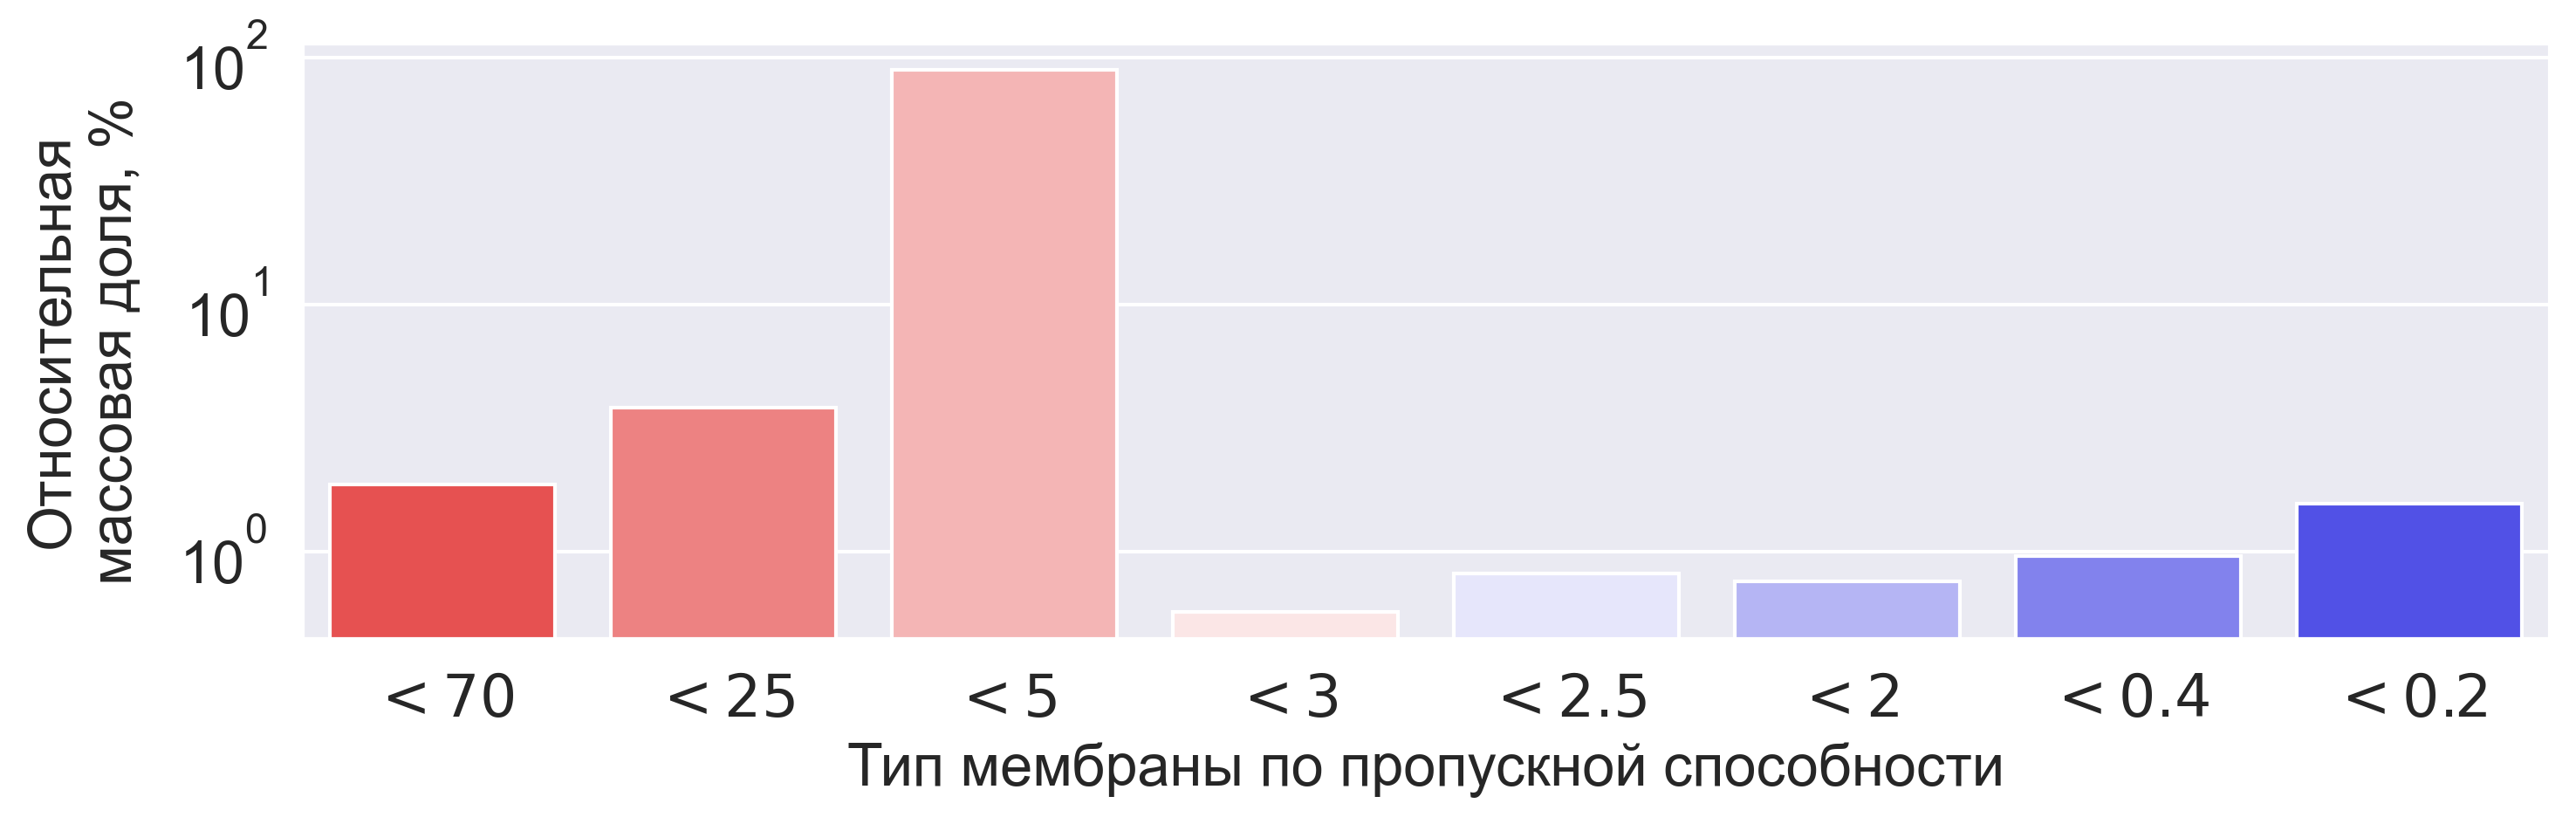

In [12]:
fig, ax = plt.subplots(figsize=(10, 3.3), dpi=300)

sns.barplot(
    data=data,
    x='membrane',
    y='ratio',
    palette='bwr_r',
    ax=ax
)

ax.set_xlabel('Тип мембраны по пропускной способности', fontsize=fontsize)
ax.set_ylabel('Относительная\nмассовая доля, %', fontsize=fontsize, labelpad=10)

ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

ax.set_yscale('log', base=10)

plt.tight_layout()

plt.savefig(f'{path_to_save}/mass_fractions_barplot.png', dpi=600)

plt.show()